In [ ]:
## <font color='blue'>Projeto Operadora</font>

## Classificar operadoras

In [1]:
# Imports
import math
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
from pyspark.sql import Row
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
from sklearn import preprocessing
from pandas.tools.plotting import radviz
import matplotlib.patches as patches
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import string as str
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pyspark.ml.classification import LogisticRegression, OneVsRest

In [2]:
# Carregando os dados
#dados = sc.textFile("projeto4_telecom_teste.csv") #context apache
dados = pd.read_csv("projeto4_telecom_teste.csv")  #pandas

In [3]:
#visualizando os dados no qual foram carregados
dados.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [4]:
#carregando colunas especificas no DataFrame
df = pd.DataFrame(dados, columns = ['account_length','area_code','state','number_vmail_messages','international_plan','voice_mail_plan','total_day_minutes','total_day_charge','total_eve_minutes','total_eve_charge','total_night_minutes','total_night_charge','total_intl_minutes','total_intl_charge','churn'])

In [5]:
#analisando os 5 últimos dados após o carregamento das colunas acima
df.tail()

,account_length,area_code,state,number_vmail_messages,international_plan,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,churn
1662,50,area_code_408,HI,40,no,yes,235.7,40.07,223.0,18.96,297.5,13.39,9.9,2.67,no
1663,152,area_code_415,WV,0,no,no,184.2,31.31,256.8,21.83,213.6,9.61,14.7,3.97,yes
1664,61,area_code_415,DC,0,no,no,140.6,23.90,172.8,14.69,212.4,9.56,13.6,3.67,no
1665,109,area_code_510,DC,0,no,no,188.8,32.10,171.7,14.59,224.4,10.10,8.5,2.30,no
1666,86,area_code_415,VT,34,no,yes,129.4,22.00,267.1,22.70,154.8,6.97,9.3,2.51,no


In [6]:
#classificando informações de colunas como String para valores numéricos
#PreProcessamento, realizando a transformação de dados
le = preprocessing.LabelEncoder()

In [9]:
# Fit the encoder to the pandas column
le.fit(df['international_plan'])
#le.fit(df['voice_mail_plan'])
#le.fit(df['churn'])
#le.fit(df['area_code'])
#le.fit(df['state'])

LabelEncoder()

In [10]:
# Apply the fitted encoder to the pandas column
df['international_plan'] = le.transform(df['international_plan'])
#df['voice_mail_plan'] = le.transform(df['voice_mail_plan'])
#df['churn'] = le.transform(df['churn'])
#df['area_code'] = le.transform(df['area_code'])
#df['state'] = le.transform(df['state'])

In [11]:
le.fit(df['voice_mail_plan'])

LabelEncoder()

In [12]:
df['voice_mail_plan'] = le.transform(df['voice_mail_plan'])

In [13]:
le.fit(df['churn'])

LabelEncoder()

In [14]:
df['churn'] = le.transform(df['churn'])

In [15]:
le.fit(df['area_code'])

LabelEncoder()

In [16]:
df['area_code'] = le.transform(df['area_code'])

In [17]:
le.fit(df['state'])

LabelEncoder()

In [18]:
df['state'] = le.transform(df['state'])

In [19]:
#realizando o backUp do dataFrame carregado e convertido colunas do tipo String em numéricos para um novo DF
df2 = df.copy()

In [20]:
#ANALIsando as informações carregadas após a conversão acima
df2.tail()

,account_length,area_code,state,number_vmail_messages,international_plan,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,churn
1662,50,0,11,40,0,1,235.7,40.07,223.0,18.96,297.5,13.39,9.9,2.67,0
1663,152,1,49,0,0,0,184.2,31.31,256.8,21.83,213.6,9.61,14.7,3.97,1
1664,61,1,7,0,0,0,140.6,23.90,172.8,14.69,212.4,9.56,13.6,3.67,0
1665,109,2,7,0,0,0,188.8,32.10,171.7,14.59,224.4,10.10,8.5,2.30,0
1666,86,1,46,34,0,1,129.4,22.00,267.1,22.70,154.8,6.97,9.3,2.51,0


In [30]:
#Análise exploratória dos dados
#fazendo a correlação das colunas do DF
correlacao = df2.corr(method = 'pearson')

In [33]:
#Análise exploratória dos dados
correlacao

,account_length,area_code,state,number_vmail_messages,international_plan,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,churn
account_length,1.000000,-0.042239,0.023352,-0.038609,-0.007291,-0.030369,-0.014926,-0.014927,-0.016229,-0.016241,0.019004,0.018979,-0.014783,-0.014848,0.029702
area_code,-0.042239,1.000000,0.003413,-0.012681,-0.001936,-0.008752,-0.024035,-0.024042,0.004609,0.004615,0.033460,0.033489,0.025488,0.025447,0.015024
state,0.023352,0.003413,1.000000,-0.026991,0.032175,-0.027523,0.036768,0.036767,-0.016100,-0.016096,-0.020978,-0.020988,-0.012166,-0.012224,0.004967
number_vmail_messages,-0.038609,-0.012681,-0.026991,1.000000,0.017560,0.949129,0.016747,0.016739,0.022495,0.022480,-0.000367,-0.000348,0.003040,0.003116,-0.116343
international_plan,-0.007291,-0.001936,0.032175,0.017560,1.000000,0.014308,-0.016771,-0.016765,0.025369,0.025354,-0.022021,-0.022012,0.002167,0.002207,0.257202
voice_mail_plan,-0.030369,-0.008752,-0.027523,0.949129,0.014308,1.000000,0.011802,0.011794,0.026008,0.025993,0.002771,0.002797,0.017418,0.017487,-0.131207
total_day_minutes,-0.014926,-0.024035,0.036768,0.016747,-0.016771,0.011802,1.000000,1.000000,-0.047466,-0.047467,0.027850,0.027848,-0.039961,-0.039876,0.213878
total_day_charge,-0.014927,-0.024042,0.036767,0.016739,-0.016765,0.011794,1.000000,1.000000,-0.047471,-0.047473,0.027858,0.027856,-0.039969,-0.039884,0.213862
total_eve_minutes,-0.016229,0.004609,-0.016100,0.022495,0.025369,0.026008,-0.047466,-0.047471,1.000000,1.000000,-0.025248,-0.025238,0.023836,0.023977,0.081612
total_eve_charge,-0.016241,0.004615,-0.016096,0.022480,0.025354,0.025993,-0.047467,-0.047473,1.000000,1.000000,-0.025261,-0.025251,0.023838,0.023979,0.081613


In [34]:
#analisando os tipos de colunas carregadas
df2.dtypes

account_length             int64
area_code                  int32
state                      int32
number_vmail_messages      int64
international_plan         int32
voice_mail_plan            int32
total_day_minutes        float64
total_day_charge         float64
total_eve_minutes        float64
total_eve_charge         float64
total_night_minutes      float64
total_night_charge       float64
total_intl_minutes       float64
total_intl_charge        float64
churn                      int32
dtype: object

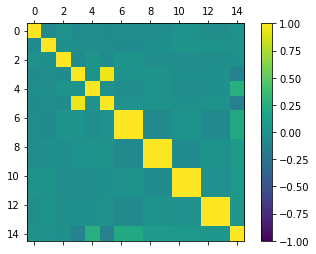

In [35]:
# Plot
#analisando em um plot a correlação dos dados
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

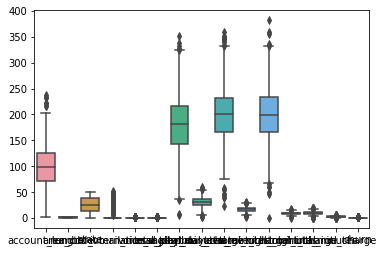

In [36]:
### Visualização com Seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Boxplot com orientação vertical
sns.boxplot(data = df2, orient = "v")

In [37]:
#analisando os valores carregados
df2.values

array([[101.  ,   2.  ,  11.  , ...,  10.6 ,   2.86,   0.  ],
       [137.  ,   2.  ,  26.  , ...,   9.5 ,   2.57,   0.  ],
       [103.  ,   0.  ,  35.  , ...,  13.7 ,   3.7 ,   0.  ],
       ...,
       [ 61.  ,   1.  ,   7.  , ...,  13.6 ,   3.67,   0.  ],
       [109.  ,   2.  ,   7.  , ...,   8.5 ,   2.3 ,   0.  ],
       [ 86.  ,   1.  ,  46.  , ...,   9.3 ,   2.51,   0.  ]])

In [41]:
#normalizando dados
array = df2.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:6]
Y = array[:,6]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[1 'HI' 101 ... 2.86 3 'no']
 [2 'MT' 137 ... 2.57 0 'no']
 [3 'OH' 103 ... 3.7 1 'no']
 ...
 [1665 'DC' 61 ... 3.67 1 'no']
 [1666 'DC' 109 ... 2.3 0 'no']
 [1667 'VT' 86 ... 2.51 0 'no']]

Dados Normalizados: 

 [[0.42194093 1.         0.22       0.         0.         0.        ]
 [0.57383966 1.         0.52       0.         0.         0.        ]
 [0.43037975 0.         0.7        0.55769231 0.         1.        ]
 [0.41350211 0.5        0.64       0.         0.         0.        ]
 [0.45147679 0.5        0.8        0.         0.         0.        ]]


In [42]:
#padronizando dados

array = df2.values

# Separando o array em componentes de input e output
X = array[:,0:6]
Y = array[:,6]


# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[1 'HI' 101 ... 2.86 3 'no']
 [2 'MT' 137 ... 2.57 0 'no']
 [3 'OH' 103 ... 3.7 1 'no']
 ...
 [1665 'DC' 61 ... 3.67 1 'no']
 [1666 'DC' 109 ... 2.3 0 'no']
 [1667 'VT' 86 ... 2.51 0 'no']]

Dados Padronizados: 

 [[ 0.05974595  1.43265256 -1.00790183 -0.53417159 -0.3144509  -0.56280161]
 [ 0.9737082   1.43265256  0.00837243 -0.53417159 -0.3144509  -0.56280161]
 [ 0.11052163 -1.4070999   0.61813698  1.65760038 -0.3144509   1.77682504]
 [ 0.00897027  0.01277633  0.41488213 -0.53417159 -0.3144509  -0.56280161]
 [ 0.23746083  0.01277633  0.95689507 -0.53417159 -0.3144509  -0.56280161]]


In [44]:
#redução de dimensionalidade
# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


array = df2.values

# Separando o array em componentes de input e output
X = array[:,0:6]
Y = array[:,6]

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 6)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.42737693 0.21836391 0.15535118 0.14199112 0.04841851 0.00849834]
[[-1.24679601e-02 -1.42233253e-02 -2.57171694e-02  5.01714085e-01
   1.29972933e-02  8.64346528e-01]
 [-2.59135335e-02  9.99530947e-01  7.02685576e-03  4.81517790e-03
  -3.24972640e-03  1.35370137e-02]
 [ 1.44414231e-02 -5.04296318e-03  9.17383616e-01  1.01170444e-02
   3.97276234e-01  1.55741446e-02]
 [-1.37260793e-02  5.73761437e-03 -3.96662838e-01 -8.70197222e-03
   9.17570179e-01 -2.06521340e-02]
 [ 9.99279032e-01  2.58499992e-02 -1.88452687e-02 -6.64537498e-03
   6.98279644e-03  1.80313304e-02]
 [-1.47477028e-02 -3.00136405e-03 -1.22985661e-05 -8.64891641e-01
   2.88297950e-03  5.01724660e-01]]


In [40]:
# Aplicando o modelo após o carregamento
# ransformação dos dodas, an[álise exploratória, preprocessamento, normalização e padronização dos dados
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

array = df2.values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = array[:,4]

# Definindo os valores para o número de folds
num_folds = 5
random_state = 3

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y)


# Cross Validation
#results = cross_val_score(modelo, X, Y, cv = kfold)


print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y))
print(utils.multiclass.type_of_target(Y.astype('int')))
print(utils.multiclass.type_of_target(Y))
print("Acurácia: %.3f" % (training_scores_encoded.mean()))

[0 0 0 ... 0 0 0]
binary
binary
binary
Acurácia: 0.090
